In [1]:
library(rethinking)
data(Howell1)
d <- Howell1

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: parallel

rethinking (Version 2.13)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




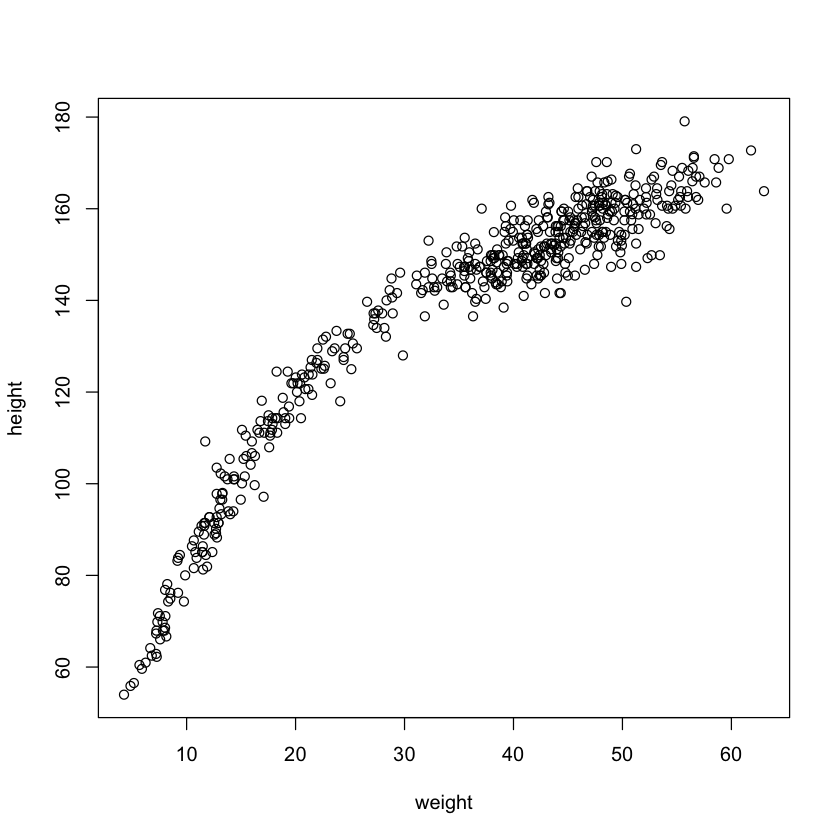

In [2]:
plot(height ~ weight, d)

In [6]:
d$weight_s <- ( d$weight - mean(d$weight)) / sd(d$weight)
d$weight_s2 <- d$weight_s^2

m4.5 <- quap(
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b1*weight_s + b2*weight_s2,
        a ~ dnorm(178, 20 ),
        b1 ~ dlnorm(0, 1),
        b2 ~ dnorm(0,1),
        sigma ~ dunif(0, 50)
    ), data = d
)

In [7]:
precis(m4.5)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,146.057411,0.3689755,145.467717,146.647105
b1,21.733064,0.2888890,21.271364,22.194765
b2,-7.803265,0.2741838,-8.241464,-7.365066
sigma,5.774473,0.1764651,5.492448,6.056499


In [10]:
PI <- function (samples, prob = 0.89) 
{
    x <- sapply(prob, function(p) {
        a <- (1 - p)/2
        quantile(samples, probs = c(a, 1 - a))
    })
    n <- length(prob)
    result <- rep(0, n * 2)
    for (i in 1:n) {
        low_idx <- n + 1 - i
        up_idx <- n + i
        result[low_idx] <- x[1, i]
        result[up_idx] <- x[2, i]
        a <- (1 - prob[i])/2
        names(result)[low_idx] <- concat(round(a * 100, 0), "%")
        names(result)[up_idx] <- concat(round((1 - a) * 100, 
            0), "%")
    }
    return(result)
}

In [13]:
weight.seq <- seq(-2.2, 2, length.out=30)
pred_dat <- list(weight_s=weight.seq, weight_s2=weight.seq^2)
mu <- link(m4.5, data=pred_dat)
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI, prob=0.89)
sim.height <- sim(m4.5, data=pred_dat)
height.PI <- apply(sim.height, 2, PI, prob=0.89)

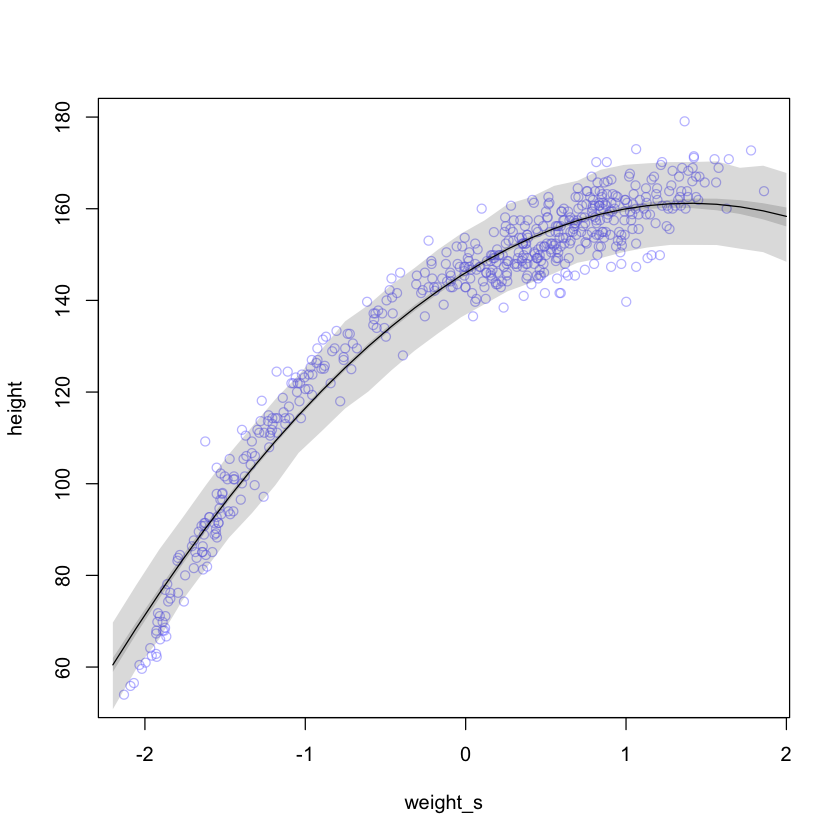

In [14]:
plot(height ~ weight_s, d, col=col.alpha(rangi2, 0.5))
lines(weight.seq, mu.mean)
shade(mu.PI, weight.seq)
shade(height.PI, weight.seq)

## Cherry Blossom Splines

In [15]:
data(cherry_blossoms)
d <- cherry_blossoms
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
year,1408.000000,350.8845964,867.77000,1948.23000,▇▇▇▇▇▇▇▇▇▇▇▇▁
doy,104.540508,6.4070362,94.43000,115.00000,▁▂▅▇▇▃▁▁
temp,6.141886,0.6636479,5.15000,7.29470,▁▃▅▇▃▂▁▁
temp_upper,7.185151,0.9929206,5.89765,8.90235,▁▂▅▇▇▅▂▂▁▁▁▁▁▁▁
temp_lower,5.098941,0.8503496,3.78765,6.37000,▁▁▁▁▁▁▁▃▅▇▃▂▁▁▁


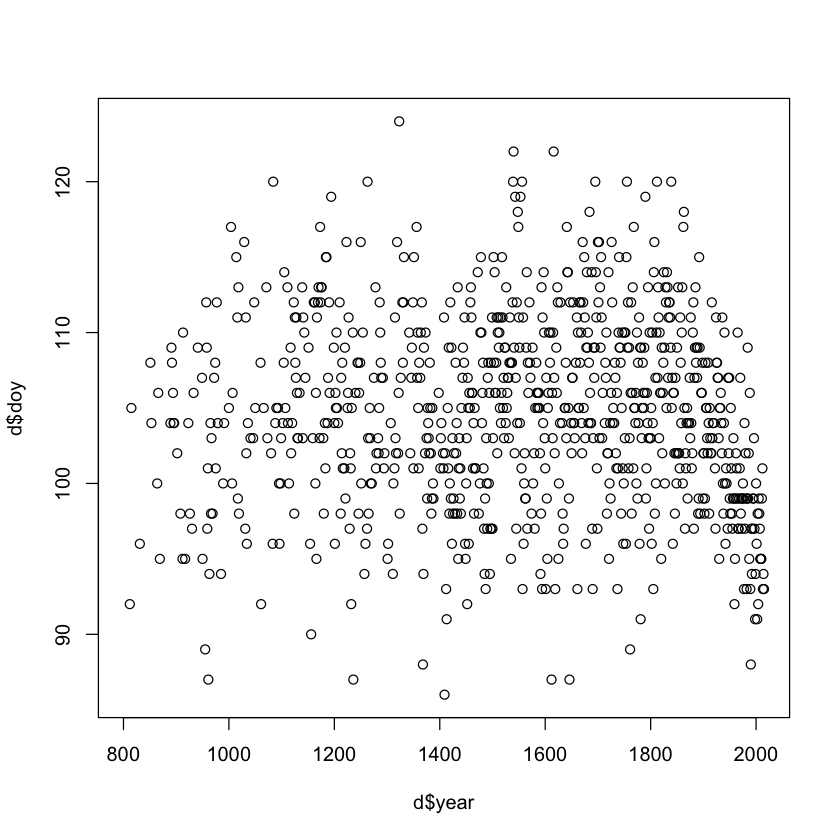

In [18]:
plot(d$year, d$doy)